In [20]:
using Jacobi
using PyPlot
include("../../HPFEM.jl/src/HPFEM.jl");

In [21]:
M = 10
Q = M
lagr = HPFEM.Lagrange1d(M);
quad = HPFEM.QuadType(Q);
base = HPFEM.Basis1d(lagr, quad);

In [22]:
elemento = HPFEM.Element1d(1, -1.0, 1.0, base);
Mass = HPFEM.mass_matrix(base, elemento);



In [23]:
fun(x) = sin(2*pi*x)
x = linspace(-1,1,101)
#plot(x,fun(x));

In [24]:
Fe = zeros(Q)
fe = fun(elemento.ξ)
HPFEM.add_rhs!(base, elemento, fe, Fe)
uh = Mass\Fe
#plot(uh)
uh - fe


20-element Array{Float64,1}:
  8.36817e-12
  0.493517   
  0.577648   
  0.173518   
 -0.511376   
 -1.0214     
 -0.953823   
 -0.370622   
  0.160679   
  0.160057   
 -0.160057   
 -0.160679   
  0.370622   
  0.953823   
  1.0214     
  0.511376   
 -0.173518   
 -0.577648   
 -0.493517   
  1.03986e-11

In [25]:
Q2 = 101
x =linspace(-1,1,Q2)

linspace(-1.0,1.0,101)

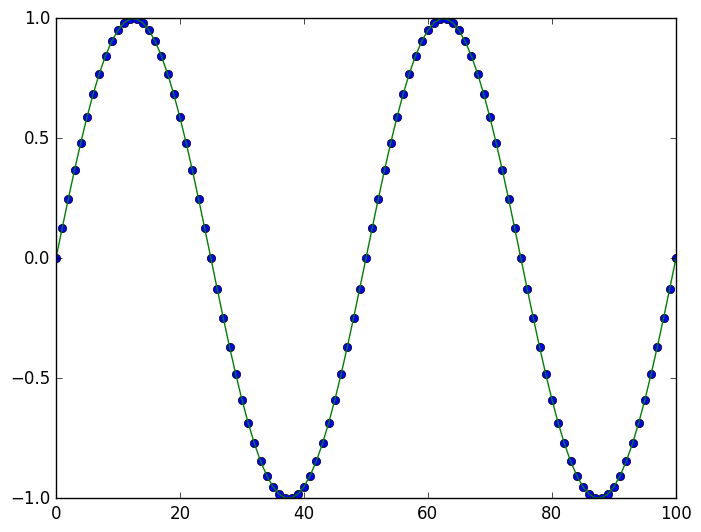

1.2055012543754628e-9

In [26]:
#u = zeros(Q)
test = zeros(101,M)
for i in 1 :Q
    test[:,i] = base(x,i)
end
plot(test*uh,"o")
plot(fun(x))
maxabs(test*uh - fun(x))